## 資料集介紹

* MNIST 資料集共有訓練資料 60000 筆、測試資料 10000 筆。MNIST 資料集每一筆資料都由 images(數字影像) 與 labels(真實數字) 所組成

## 匯入套件

In [ ]:
# 相容性需求，若使用舊版 pyton 時，可使用新版 python 函式
import numpy as np
import pandas as pd 
from keras.utils import np_utils  # 欲將 Label 標籤轉換為 One-hot encoding

In [ ]:
import matplotlib.pyplot as plt

# 設定 matplotlib 在 jupyter notebook 網頁內顯示圖形，無則另開視窗顯示圖形
%matplotlib inline

In [ ]:
np.random.seed(10)                # 設定 seed 可以讓每次需要隨機產生的資料，都有相同的輸出

In [ ]:
# 匯入資料
from keras.datasets import mnist

# 建立模型
from keras.models import Sequential
from keras.layers import Dense

# 主要加入這個 dropout
from keras.layers import Dropout

## 資料讀取

* 【Window】下載後的檔案會儲存在「使用者個人資料夾」，如：C:\Users\kevin\.keras\datasets\mnist.npz
* 【Linus】輸入指令：ll ~/.：ll ~/.keras\datasets\mnist.pkl.npz

In [ ]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 資料筆數
print('x train data =', len(x_train_image))
print('x test data =', len(x_test_image))
print('y train label =', len(y_train_label))
print('y test label =', len(y_test_label))

x train data = 60000
x test data = 10000
y train label = 60000
y test label = 10000


* 訓練資料是由 images 與 labels 所組成共 60000 筆，image 是單色的數字影像，label 是數字影像的真實值

In [ ]:
# 資料型態
print('x_train_image : ', x_train_image.shape)
print('y_train_label : ', y_train_label.shape)
print('='*20)
print('x_test_image : ', x_test_image.shape)
print('y_test_label : ', y_test_label.shape)

x_train_image :  (60000, 28, 28)
y_train_label :  (60000,)
x_test_image :  (10000, 28, 28)
y_test_label :  (10000,)


## 把影像畫出來

* 多筆

In [ ]:
# 建立函數要來畫多圖的(數字影像, 真時值, 預測結果, 開始顯示的資料index, 要顯示的資料筆數(預設10,不要超過25))
def plot_images_labels_prediction(images, labels, prediction, idx, num=10): 
  
  # 設定顯示圖形的大小
  fig = plt.gcf()
  fig.set_size_inches(12, 14)

  # 最多25張
  if num>25:num=25

  # 一張一張畫
  for i in range(0, num):

    # 建立子圖形5*5(五行五列)
    ax = plt.subplot(5, 5, i+1)

    # 畫出子圖形
    ax.imshow(images[idx], cmap='binary')

    # 標題和label
    title = "label=" +str(labels[idx])

    # 如果有傳入預測結果也顯示
    if len(prediction) > 0:
      title += ",predict=" + str(prediction[idx])

    # 設定子圖形的標題大小
    ax.set_title(title, fontsize=10)

    # 設定不顯示刻度
    ax.set_xticks([])
    ax.set_yticks([]) 
    # 讀取下一筆 
    idx += 1
  plt.show()  

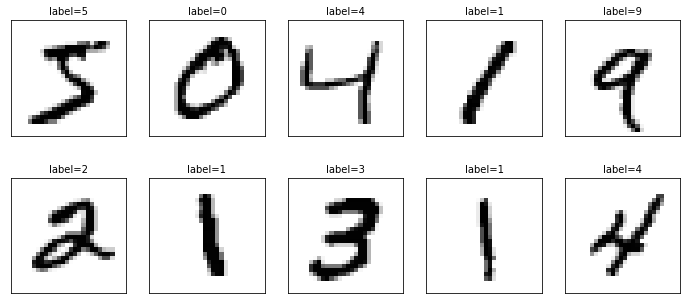

In [ ]:
  plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)  

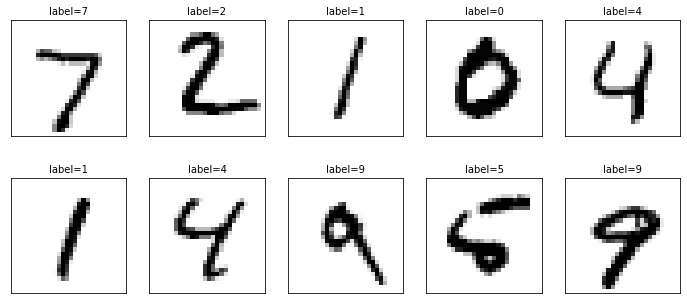

In [ ]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)  

* 單筆

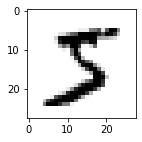

In [ ]:
def plot_image(image):
  fig = plt.gcf()                      # 設定顯示圖形的大小
  fig.set_size_inches(2, 2)
  plt.imshow(image, cmap='binary')     # 使用plt.imshow顯示圖形，傳入參數image是28X28的圖形，cmap參數設定以黑白灰階顯示
  plt.show()

# 呼叫 plot_image
plot_image(x_train_image[0])

In [ ]:
y_train_label[0]

5

## 資料預處理

### Feature

* 資料預處理
  * 將原本 28X28 數字影像，以 reshape 轉換為 1 維的向量，其長度是 784，並轉換為 float
  * 數字影像 image 的數字標準化：每一個數字是由 0 至 255，代表每個點的灰階深淺，標準化可提高後續訓練模型的準確率，最簡單標準化的方式是除以255

In [ ]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [ ]:
# 資料型態
print('x_train : ', x_Train.shape)
print('x_test : ', x_Test.shape)

x_train :  (60000, 784)
x_test :  (10000, 784)


In [ ]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

### Label

* 資料預處理
  * label 原本為 0-9 的數字，必須 One-hot encoding 轉換為 10 個 0 或 1 的組合

In [ ]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [ ]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 建立模型

* 將預處理後的 Feature 和 Label 輸入多層感知器模型進行訓練，訓練完成的模型作為預測使用

In [ ]:
# 建立 Sequential
model = Sequential()

# 建立「輸入層」(28X28=784)與「隱藏層」(256)，使用常態分佈的亂數，初始化 weight 與 bias
# h1=relu(X x W1 + b1)
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.5))

# 建立「輸出層」(10)，使用常態分佈的亂數，初始化 weight 與 bias
# y=softmax(h1 x W2 + b2)
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [ ]:
# Param 計算方式=(上層神經元數)X(本層神經元數)+(本層神經元數)
# 第一層 Param 計算方式=784X256+256=200960
# 第二層 Param 計算方式=256X10+10=2570
# 總 Param 計算方式=200960+2570=203530
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


* compile 方法對訓練模型進行設定
  * loss：設定損失函數，在深度學習通常使用 cross_entropy 交叉熵，訓練效果比較好
  * optimizer：設定訓練時的最優化方法，在深度學習使用 adam 最優畫方法，可讓訓練更快收斂，並提高準確度
  * metrics：設定評估模型的方法是 accuracy 準確率
  

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* 使用 model.fit 進行訓練，訓練過程會儲存在 train_history 變數
  * validation_split=0.2：80% 作為訓練資料，20% 作為驗證資料
  * epoch=10：執行 10 次訓練週期
  * batch_size=200：每一批次 200 筆資料
  * verbose=2：顯示訓練過程，訓練完成後會計算此次訓練週期的 accuracy 與 loss，並記錄新增一筆紀錄在 train_history 中
    →使用48000筆訓練資料進行訓練，每一批次200筆，大約可分240批次進行訓練

In [ ]:
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 2s - loss: 0.4462 - accuracy: 0.8818 - val_loss: 0.2224 - val_accuracy: 0.9382 - 2s/epoch - 9ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1952 - accuracy: 0.9440 - val_loss: 0.1611 - val_accuracy: 0.9536 - 1s/epoch - 6ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1384 - accuracy: 0.9609 - val_loss: 0.1278 - val_accuracy: 0.9642 - 1s/epoch - 6ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1044 - accuracy: 0.9709 - val_loss: 0.1107 - val_accuracy: 0.9681 - 1s/epoch - 6ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0839 - accuracy: 0.9756 - val_loss: 0.1023 - val_accuracy: 0.9705 - 1s/epoch - 6ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0671 - accuracy: 0.9812 - val_loss: 0.0942 - val_accuracy: 0.9725 - 1s/epoch - 6ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0553 - accuracy: 0.9843 - val_loss: 0.0923 - val_accuracy: 0.9736 - 1s/epoch - 6ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0463 - accuracy: 0.9876 - val_loss: 0.0827 - val_accuracy: 0.9756 - 1s/epoch - 6ms/step
Epoch 9/10
240/240 - 2s 

### 顯示訓練過程

In [ ]:
# train_history：訓練結果，train：訓練資料，validation：驗證資料
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])            
  plt.plot(train_history.history[validation])
  plt.title('Train History')                  # 顯示圖的標題
  plt.ylabel(train)                           # y軸標籤
  plt.xlabel('Epoch')                         # x軸標籤
  plt.legend(['train', 'validation'], loc='upper left')     # 圖例顯示在左上角
  plt.show()

* 結果
  * 準確率越來越高，且「acc 訓練的準確率」比「val_acc 驗證的準確率」高
  * 驗證的誤差越來越低，且「loss 訓練的誤差」比「val_loss 驗證的誤差」小
  * 若「acc 訓練的準確率」一直增加，但「val_acc 驗證的準確率」一直沒增加，就可能是 overfitting 過度擬合的現象
  * 若「acc 訓練的準確率」與「val_acc 驗證的準確率」差距很小，代表已改善 overfitting 的問題


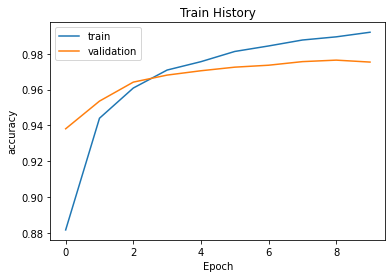

In [ ]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

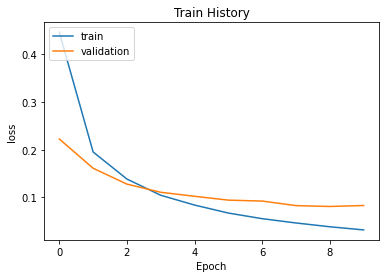

In [ ]:
show_train_history(train_history, 'loss', 'val_loss')

## Predict Data

### 評估模型

* 輸入數字影像，預處理後產生的 Features，使用訓練完成的多層感知器模型進行預測，最後產生預測結果是 0-9 的數字

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_normalize, y_TestOneHot)   # 評估後的準確率會儲存在 scores
print()
print('\t[Info] Accuracy of testing data = {:2.1f}%'.format(scores[1]*100.0))

313/313 [==============================] - 2s 5ms/step - loss: 0.0713 - accuracy: 0.9779

	[Info] Accuracy of testing data = 97.8%


In [ ]:
prediction = np.argmax(model.predict(x_Test), axis=1)       # 預測結果存在 prediction 變數
prediction

array([7, 2, 1, ..., 4, 5, 6])

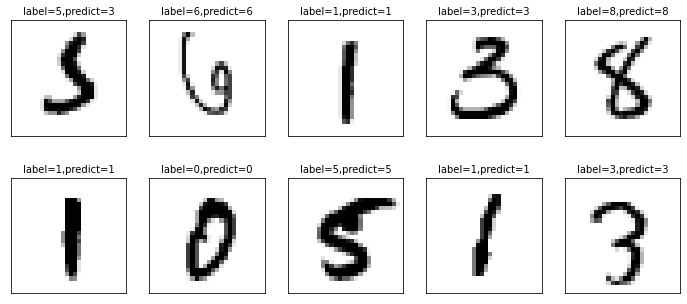

In [ ]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

### 混淆矩陣 confussion table

* 對角線是預測正確：被正確預測為「1」的筆數最高，不易混淆，被正確預測為「5」的筆數最低，最易混淆
* 其他非對角線的數字，代表將某個標籤預測錯誤，成為另一個標籤：真實為「5」，但預測為「3」最多

In [ ]:
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['prediction']) 

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,0,3,2,0,2,1,2,0
1,0,1128,3,0,0,1,2,0,1,0
2,5,3,1007,3,1,0,2,5,6,0
3,0,0,3,995,0,2,0,3,4,3
4,2,0,2,1,962,0,6,1,1,7
5,3,1,0,18,1,852,8,1,5,3
6,5,3,2,1,1,4,941,0,1,0
7,1,6,7,7,1,0,0,998,1,7
8,3,2,4,11,3,2,2,4,940,3


* 建立 dataframe 包含：label(真實值)、prediction(預測值)
* 查詢真實為「5」，但預測為「3」的資料

In [ ]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
2810,5,3
3702,5,3
3902,5,3
4271,5,3


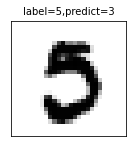

In [ ]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=2810, num=1)

## 隱藏層增加為1000個神經元

In [ ]:
model = Sequential()

model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='softmax'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1000)              785000    
                                                                 
 dense_7 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 開始訓練
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 5s - loss: 2.0178 - accuracy: 0.7229 - val_loss: 1.7220 - val_accuracy: 0.8260 - 5s/epoch - 19ms/step
Epoch 2/10
240/240 - 4s - loss: 1.5398 - accuracy: 0.8311 - val_loss: 1.3587 - val_accuracy: 0.8461 - 4s/epoch - 17ms/step
Epoch 3/10
240/240 - 4s - loss: 1.2307 - accuracy: 0.8441 - val_loss: 1.0972 - val_accuracy: 0.8537 - 4s/epoch - 18ms/step
Epoch 4/10
240/240 - 5s - loss: 1.0060 - accuracy: 0.8526 - val_loss: 0.9089 - val_accuracy: 0.8580 - 5s/epoch - 20ms/step
Epoch 5/10
240/240 - 7s - loss: 0.8450 - accuracy: 0.8569 - val_loss: 0.7734 - val_accuracy: 0.8593 - 7s/epoch - 28ms/step
Epoch 6/10
240/240 - 5s - loss: 0.7293 - accuracy: 0.8600 - val_loss: 0.6759 - val_accuracy: 0.8602 - 5s/epoch - 22ms/step
Epoch 7/10
240/240 - 5s - loss: 0.6447 - accuracy: 0.8619 - val_loss: 0.6069 - val_accuracy: 0.8631 - 5s/epoch - 21ms/step
Epoch 8/10
240/240 - 5s - loss: 0.5823 - accuracy: 0.8641 - val_loss: 0.5535 - val_accuracy: 0.8621 - 5s/epoch - 22ms/step
Epoch 9/10
240/2

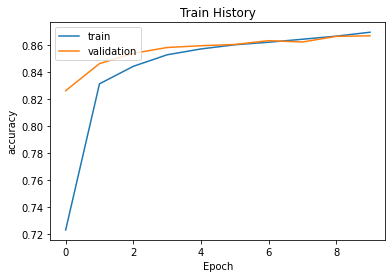

In [ ]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

In [ ]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4888 - accuracy: 0.8645

accuracy 0.8644999861717224


### 加入 dropout 避免overfitting

In [ ]:
model = Sequential()

model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 開始訓練
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=200, verbose=2)

Epoch 1/20
240/240 - 9s - loss: 2.0583 - accuracy: 0.5319 - val_loss: 1.7532 - val_accuracy: 0.8273 - 9s/epoch - 38ms/step
Epoch 2/20
240/240 - 8s - loss: 1.6558 - accuracy: 0.5204 - val_loss: 1.3947 - val_accuracy: 0.9063 - 8s/epoch - 35ms/step
Epoch 3/20
240/240 - 9s - loss: 1.4795 - accuracy: 0.5311 - val_loss: 1.1781 - val_accuracy: 0.9194 - 9s/epoch - 39ms/step
Epoch 4/20
240/240 - 9s - loss: 1.3906 - accuracy: 0.5379 - val_loss: 1.0456 - val_accuracy: 0.9262 - 9s/epoch - 36ms/step
Epoch 5/20
240/240 - 6s - loss: 1.3281 - accuracy: 0.5578 - val_loss: 0.9392 - val_accuracy: 0.9297 - 6s/epoch - 27ms/step
Epoch 6/20
240/240 - 6s - loss: 1.2846 - accuracy: 0.5590 - val_loss: 0.8599 - val_accuracy: 0.9304 - 6s/epoch - 26ms/step
Epoch 7/20
240/240 - 5s - loss: 1.2475 - accuracy: 0.5664 - val_loss: 0.7817 - val_accuracy: 0.9347 - 5s/epoch - 22ms/step
Epoch 8/20
240/240 - 8s - loss: 1.2039 - accuracy: 0.5978 - val_loss: 0.7324 - val_accuracy: 0.9339 - 8s/epoch - 34ms/step
Epoch 9/20
240/2

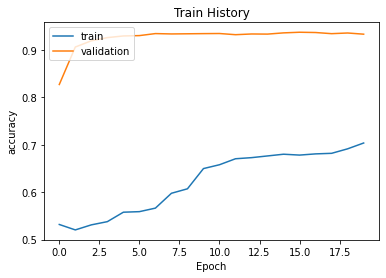

In [ ]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

In [ ]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4044 - accuracy: 0.9297

accuracy 0.9297000169754028


### 建立多層感知模型包含2 個隱藏層

In [ ]:
model = Sequential()

model(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [ ]:
# 開始訓練
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=200, verbose=2)

Epoch 1/20
240/240 - 6s - loss: 0.5861 - accuracy: 0.8136 - val_loss: 0.2142 - val_accuracy: 0.9434 - 6s/epoch - 23ms/step
Epoch 2/20
240/240 - 5s - loss: 0.3377 - accuracy: 0.8948 - val_loss: 0.1575 - val_accuracy: 0.9575 - 5s/epoch - 20ms/step
Epoch 3/20
240/240 - 5s - loss: 0.2669 - accuracy: 0.9170 - val_loss: 0.1298 - val_accuracy: 0.9628 - 5s/epoch - 21ms/step
Epoch 4/20
240/240 - 5s - loss: 0.2274 - accuracy: 0.9282 - val_loss: 0.1178 - val_accuracy: 0.9647 - 5s/epoch - 21ms/step
Epoch 5/20
240/240 - 5s - loss: 0.2044 - accuracy: 0.9364 - val_loss: 0.1054 - val_accuracy: 0.9678 - 5s/epoch - 20ms/step
Epoch 6/20
240/240 - 5s - loss: 0.1851 - accuracy: 0.9411 - val_loss: 0.0950 - val_accuracy: 0.9713 - 5s/epoch - 20ms/step
Epoch 7/20
240/240 - 5s - loss: 0.1713 - accuracy: 0.9456 - val_loss: 0.0876 - val_accuracy: 0.9735 - 5s/epoch - 20ms/step
Epoch 8/20
240/240 - 5s - loss: 0.1656 - accuracy: 0.9473 - val_loss: 0.0866 - val_accuracy: 0.9731 - 5s/epoch - 21ms/step
Epoch 9/20
240/2

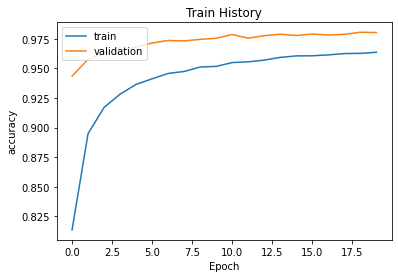

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

In [ ]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9817

accuracy 0.9817000031471252


In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_11 (Dense)            multiple                  785000    
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_12 (Dense)            multiple                  10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


* 結論
  * 多層感知器 Multilayer perceptron 模型，辨識手寫字嘗試將模型加寬加深，加入 drop 以提高準確度，避免 overfitting
  * 但多層感知器有其極限，若要提高準確度，就要使用卷積神經網路 CNN